# Capstone Project - Data Cleaning and Exploratory Data Analysis

## Import the library needed in the program

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
from plotly import __version__
print (__version__)
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import requests
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score

3.7.1


## Load the database

In [2]:
# read the database through csv.file
tenant_database = pd.read_csv(r'C:\Users\Randy\Intergrated_updated.csv')
tenant_database.head(10)

,number,tenant,ten_numb,apt,building,company,pm,apm,nu_household,contact_fre,ease_contact,follow_up,consideration,response,communication,overall,improvement
0,1,Tenant_1,2597,1A,BP,MD2PG,PM_D,PM_B,4,5.0,2.0,5.0,4.0,5.0,4.0,1.0,1
1,2,Tenant_2,2598,1C,BP,MD2PG,PM_D,PM_B,1,5.0,1.0,2.0,NaN,NaN,3.0,2.0,5
2,3,Tenant_3,2599,1D,BP,MD2PG,PM_D,PM_B,5,2.0,3.0,NaN,2.0,2.0,2.0,2.0,2
3,4,Tenant_4,2600,1E,BP,MD2PG,PM_D,PM_B,1,2.0,NaN,2.0,5.0,4.0,1.0,3.0,5
4,5,Tenant_5,2601,1F,BP,MD2PG,PM_D,PM_B,1,NaN,2.0,2.0,5.0,2.0,3.0,1.0,4
5,6,Tenant_6,2602,1G,BP,MD2PG,PM_D,PM_B,3,NaN,5.0,2.0,2.0,2.0,3.0,4.0,4
6,7,Tenant_7,2603,1H,BP,MD2PG,PM_D,PM_B,3,1.0,3.0,NaN,3.0,NaN,1.0,2.0,4
7,8,Tenant_8,2604,2A,BP,MD2PG,PM_D,PM_B,2,5.0,5.0,NaN,1.0,4.0,1.0,2.0,3
8,9,Tenant_9,2605,2B,BP,MD2PG,PM_D,PM_B,2,4.0,5.0,2.0,2.0,5.0,2.0,2.0,5
9,10,Tenant_10,2606,2C,BP,MD2PG,PM_D,PM_B,5,4.0,1.0,1.0,NaN,2.0,NaN,1.0,5


In [3]:
#assign df as database
df = tenant_database
#use count funcation to see if there is null value
df.count()

number            1574
tenant            1574
ten_numb          1574
apt               1574
building          1574
company           1574
pm                1574
apm               1324
nu_household      1574
contact_fre       1317
ease_contact      1338
follow_up         1303
consideration     1305
response          1307
communication     1306
overall           1307
improvement       1574
dtype: int64

## Data Cleaning

According to the information shown above, there is a total number of 1,574 households are there in the database. Therefore, there are 1,574 tenants were involved in the satisfaction survey. However, the summary above shows that not all the questions been answered. For example, some tenants skip the questions related to the frequency of contact, other tenants decided not to answer the question about communication. Since there is some null value in the database, there are some data cleaning procedure should be applied.

Also, the summary shows that all the tenants have their designated property manager(pm), while not all tenants have an assistant property manager(apm). One thing could be predicted is that the tenant has both the property manager and associate property manager may have better satisfaction rate than the tenant who only has a property manager.

The following step is expected to performed:
1. Fill up the blank in the database. Since there are some blanks in the assistant property manager column, the new data frame should be created.
2. Create df1 that contains scores of survey questions, and replace the NaN data with "0" to calculate the final score.
3. Add calculated columns to show the final score and satisfaction rate.
4. Create df2 to eliminate the columns that not used in the exploratory data analysis (EDA) and replace the integer to text under "improvement" column.
5. Combine two data frame to form a new data frame for EDA.

In [4]:
# assign df to df1
df1 = pd.DataFrame(df, columns = ['contact_fre', 'ease_contact', 'follow_up','consideration','response','communication','overall'])
# replace white blank with numpy nan
df1.replace(' ', np.nan, inplace=True)
# replace NaN with 0
df1.fillna(0, inplace=True)
df1.head()

,contact_fre,ease_contact,follow_up,consideration,response,communication,overall
0,5.0,2.0,5.0,4.0,5.0,4.0,1.0
1,5.0,1.0,2.0,0.0,0.0,3.0,2.0
2,2.0,3.0,0.0,2.0,2.0,2.0,2.0
3,2.0,0.0,2.0,5.0,4.0,1.0,3.0
4,0.0,2.0,2.0,5.0,2.0,3.0,1.0


Since the survey also asks the overall satisfaction out of the other six different aspects, the overall satisfaction score should be given heavier weight. The final score of overall satisfaction could be 50 percent of the sum of the other six attributes plus 50 percent of the overall score. The formula is **0.8*(sum of six attributes)+0.2* overall score**.

In [5]:
# add "sum" column for sum of first six columns
df1['sum'] = df1.iloc[:,-5:].sum(axis=1)
df1.head()

,contact_fre,ease_contact,follow_up,consideration,response,communication,overall,sum
0,5.0,2.0,5.0,4.0,5.0,4.0,1.0,19.0
1,5.0,1.0,2.0,0.0,0.0,3.0,2.0,7.0
2,2.0,3.0,0.0,2.0,2.0,2.0,2.0,8.0
3,2.0,0.0,2.0,5.0,4.0,1.0,3.0,15.0
4,0.0,2.0,2.0,5.0,2.0,3.0,1.0,13.0


In [6]:
# add "final_score" 
df1['final_score']= 0.8*df1['sum']+0.2*df1['overall']
# drop "sum" column
df1.drop(columns=['sum'],inplace=True)
df1.head()

,contact_fre,ease_contact,follow_up,consideration,response,communication,overall,final_score
0,5.0,2.0,5.0,4.0,5.0,4.0,1.0,15.4
1,5.0,1.0,2.0,0.0,0.0,3.0,2.0,6.0
2,2.0,3.0,0.0,2.0,2.0,2.0,2.0,6.8
3,2.0,0.0,2.0,5.0,4.0,1.0,3.0,12.6
4,0.0,2.0,2.0,5.0,2.0,3.0,1.0,10.6


In [7]:
# check the max and min value
df1['final_score'].max(),df1['final_score'].min()

(19.400000000000002, 0.8)

Since the final socre is not very intuitive. The satifaction rate column should be added and the max score should be **0.8 * 30 + 0.2 * 5**.

In [8]:
# add satisfaction_rate
df1['satisfaction_rate'] = df1['final_score']/(0.8 * 30 + 0.2 * 5)
df1.head()

,contact_fre,ease_contact,follow_up,consideration,response,communication,overall,final_score,satisfaction_rate
0,5.0,2.0,5.0,4.0,5.0,4.0,1.0,15.4,0.616
1,5.0,1.0,2.0,0.0,0.0,3.0,2.0,6.0,0.240
2,2.0,3.0,0.0,2.0,2.0,2.0,2.0,6.8,0.272
3,2.0,0.0,2.0,5.0,4.0,1.0,3.0,12.6,0.504
4,0.0,2.0,2.0,5.0,2.0,3.0,1.0,10.6,0.424


Now extract the data needed to form df2. Then combine two data frame to form a new data frame. 

In [9]:
# create new data frame
df2 = pd.DataFrame(df, columns = ['tenant', 'building', 'company','pm','apm','improvement'])
df2.head()

,tenant,building,company,pm,apm,improvement
0,Tenant_1,BP,MD2PG,PM_D,PM_B,1
1,Tenant_2,BP,MD2PG,PM_D,PM_B,5
2,Tenant_3,BP,MD2PG,PM_D,PM_B,2
3,Tenant_4,BP,MD2PG,PM_D,PM_B,5
4,Tenant_5,BP,MD2PG,PM_D,PM_B,4


Since the "improvement" column shows the aspect the tenant expected his or her property manager or assistant property manager to enhance. It is more intuitive to be text than integer. 

In [10]:
# replace integers with words
df2['improvement'].replace({1:'availability', 2:'responsiveness', 3:'problem resolution', 4:'communication',5:'friendliness' }, inplace = True)
df2.head()

,tenant,building,company,pm,apm,improvement
0,Tenant_1,BP,MD2PG,PM_D,PM_B,availability
1,Tenant_2,BP,MD2PG,PM_D,PM_B,friendliness
2,Tenant_3,BP,MD2PG,PM_D,PM_B,responsiveness
3,Tenant_4,BP,MD2PG,PM_D,PM_B,friendliness
4,Tenant_5,BP,MD2PG,PM_D,PM_B,communication


In [11]:
# combine two data frame to form a new database
df3 = pd.concat([df2, df1], axis=1, sort=False)
df3.head()

,tenant,building,company,pm,apm,improvement,contact_fre,ease_contact,follow_up,consideration,response,communication,overall,final_score,satisfaction_rate
0,Tenant_1,BP,MD2PG,PM_D,PM_B,availability,5.0,2.0,5.0,4.0,5.0,4.0,1.0,15.4,0.616
1,Tenant_2,BP,MD2PG,PM_D,PM_B,friendliness,5.0,1.0,2.0,0.0,0.0,3.0,2.0,6.0,0.240
2,Tenant_3,BP,MD2PG,PM_D,PM_B,responsiveness,2.0,3.0,0.0,2.0,2.0,2.0,2.0,6.8,0.272
3,Tenant_4,BP,MD2PG,PM_D,PM_B,friendliness,2.0,0.0,2.0,5.0,4.0,1.0,3.0,12.6,0.504
4,Tenant_5,BP,MD2PG,PM_D,PM_B,communication,0.0,2.0,2.0,5.0,2.0,3.0,1.0,10.6,0.424


In [12]:
# check dataframe
df3.count()

tenant               1574
building             1574
company              1574
pm                   1574
apm                  1324
improvement          1574
contact_fre          1574
ease_contact         1574
follow_up            1574
consideration        1574
response             1574
communication        1574
overall              1574
final_score          1574
satisfaction_rate    1574
dtype: int64

In [13]:
# check data types
df3.dtypes

tenant                object
building              object
company               object
pm                    object
apm                   object
improvement           object
contact_fre          float64
ease_contact         float64
follow_up            float64
consideration        float64
response             float64
communication        float64
overall              float64
final_score          float64
satisfaction_rate    float64
dtype: object

Based on the summary of rows and data type, the data frame is ready for Exploretory data analysis.

## EDA Study

Start with overall observation of the df3.

In [14]:
# overall summary
df3.describe(include='all')

,tenant,building,company,pm,apm,improvement,contact_fre,ease_contact,follow_up,consideration,response,communication,overall,final_score,satisfaction_rate
count,1574,1574,1574,1574,1324,1574,1574.000000,1574.000000,1574.000000,1574.000000,1574.000000,1574.000000,1574.000000,1574.000000,1574.000000
unique,1574,84,2,13,8,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Tenant_901,COOCHU,MD2PG,PM_G,PM_E,availability,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,132,1197,267,361,334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.562262,2.507624,2.447268,2.475222,2.533037,2.520330,2.489199,10.469886,0.418795
std,NaN,NaN,NaN,NaN,NaN,NaN,1.717380,1.668566,1.702831,1.709428,1.714117,1.713573,1.722171,3.189979,0.127599
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000,0.032000
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.200000,0.328000
50%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,10.400000,0.416000
75%,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,12.800000,0.512000


According to the summary above the following information can be observed:
1. There are a total of 1,574 tenants involved in the survey and respond to it.
2. 84 buildings managed by the group. The largest building the group managed is COOHU that has 132 tenants. 
3. There are 2 Companies in the group. The MD2PG is larger than the other one since there are 1,197 tenants live in the buildings managed by MD2PG. 
4. There are 13 property managers, and 8 assistant property managers work for the group.
5. There are 5 aspects that the tenants would like to see the improvement. Most tenants think the group should improve the avalivability. 
6. The average satisfaction rate is about 41.8%.
7. The highest satisfaction rate is 77.6%, and the lowest is 3.2%.
8. One thing needs to mention is that the satisfaction rate is the satisfaction rate of individual tenants to his or her PM or APM, not the integrated satisfaction rate of the PM or APM.

### By Buildings

There are 84 bulidings managed by the group, the bar-chart of the top 10 largest buildings maybe intuitive.  

In [15]:
# create a building_tenant table
building_tenant = df3.groupby(['building'])['tenant'].count().reset_index()
building_tenant.sort_values(by='tenant', ascending=False).head(10)

,building,tenant
29,COOCHU,132
2,0IN,78
39,EIGHTC,77
53,NOLITA,65
79,W95,58
35,E73,50
50,N9,49
62,SUFFOLK,48
23,BAL,46
7,2COOP,45


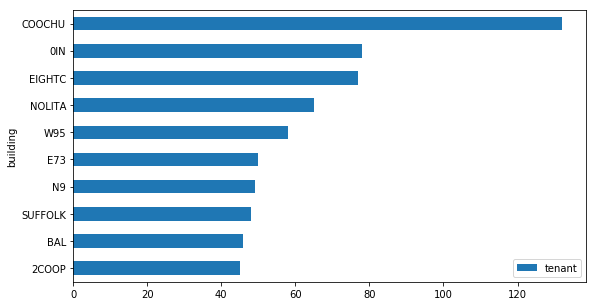

In [16]:
# build plot
building_tenant.sort_values(by='tenant', ascending=False).head(10).plot.barh(x='building',figsize=(9.2, 5))
# correct order
plt.gca().invert_yaxis()

COOCHU has largest tenants population. The top 10 are COOCHU, 0IN, EIGHTC, NOLITA, W95,E73, N9, SUFFOLK, BAL, and 2COOP.

### By Companies

There are two companies in the group and they are MD2PG and NOVUM.

In [17]:
# create a company_tenant table
company_tenant = df3.groupby(['company'])['tenant'].count().reset_index()
company_tenant.sort_values(by='tenant', ascending=False)

,company,tenant
0,MD2PG,1197
1,NOVUM,377


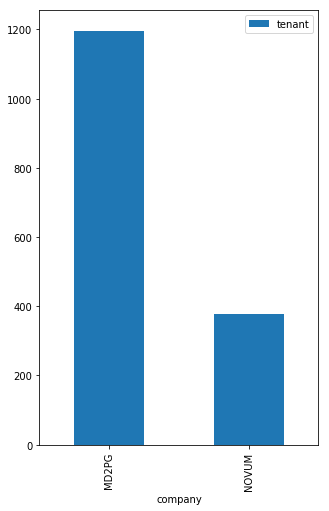

In [18]:
# build plot
company_tenant = df3.groupby(['company'])['tenant'].count().reset_index().plot.bar(x='company',figsize=(5, 8))

There are 1,197 tenants who respond survey live in the buildings managed by MD2PG, while 377 live in the buildings managed by NOVUM.

In [19]:
# create a company_building table
company_building = df3.groupby(['company'])['building'].nunique().reset_index()
company_building.sort_values(by='building', ascending=False)

,company,building
0,MD2PG,76
1,NOVUM,8


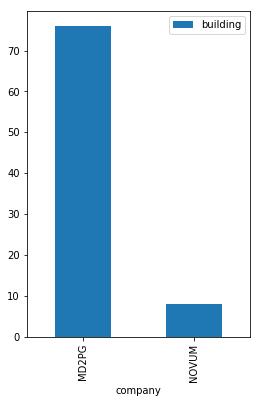

In [20]:
# build plot
company_building = df3.groupby(['company'])['building'].nunique().reset_index().plot.bar(x='company',figsize=(4, 6))

76 out of 84 buildings are managed by MD2PG, and 8 out of 84 buildings are managed by NOVUM.

In [21]:
# create a company_pm table
company_building = df3.groupby(['company'])['pm'].nunique().reset_index()
company_building.sort_values(by='pm', ascending=False)

,company,pm
0,MD2PG,12
1,NOVUM,2


In [22]:
# create a company_apm table
company_building = df3.groupby(['company'])['apm'].nunique().reset_index()
company_building.sort_values(by='apm', ascending=False)

,company,apm
0,MD2PG,7
1,NOVUM,1


There are 12 property manager work for MD2PG, and 2 work for NOVUM. For assistant property manager,ther 7 work work MD2PG, and 1 work for NOVUM.

### By Property Managers and Assistant Property Managers

In [23]:
# create a pm_tenant table
pm_tenant = df3.groupby(['pm'])['tenant'].count().reset_index()
pm_tenant.sort_values(by='tenant', ascending=False)

,pm,tenant
4,PM_G,267
2,PM_D,256
6,PM_I,245
3,PM_F,238
8,PM_K,199
1,PM_C,189
0,PM_A,69
5,PM_H,34
7,PM_J,20
10,PM_N,20


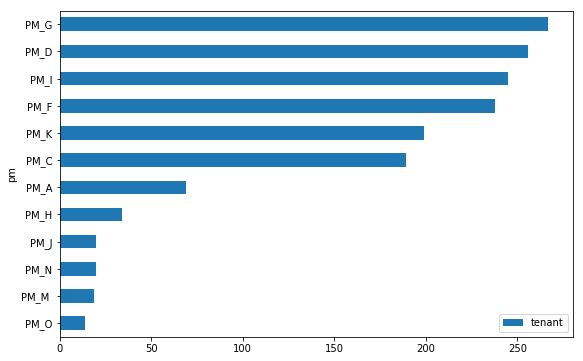

In [24]:
# build plot
pm_tenant.sort_values(by='tenant', ascending=False).head(12).plot.barh(x='pm',figsize=(9.2, 6))

# correct order
plt.gca().invert_yaxis()

In [25]:
# create a pm_building table
pm_building = df3.groupby(['pm'])['building'].nunique().reset_index()
pm_building.sort_values(by='building', ascending=False)

,pm,building
3,PM_F,20
4,PM_G,12
2,PM_D,10
1,PM_C,9
0,PM_A,8
8,PM_K,8
6,PM_I,7
5,PM_H,4
7,PM_J,2
9,PM_M,1


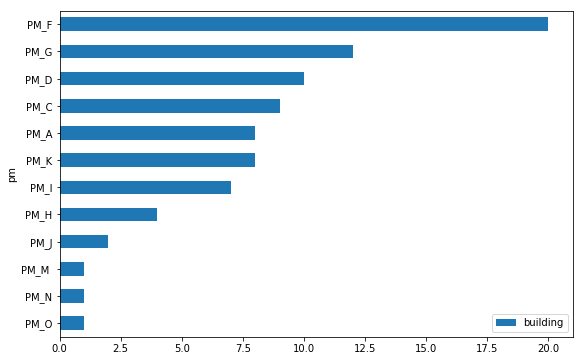

In [26]:
# build plot
pm_building.sort_values(by='building', ascending=False).head(12).plot.barh(x='pm',figsize=(9.2, 6))

# correct order
plt.gca().invert_yaxis()

PM_F manage most buildings among all property managers and PM_F manage 20 buildings.

In [27]:
# create a apm_building table
apm_building = df3.groupby(['apm'])['building'].nunique().reset_index()
apm_building.sort_values(by='building', ascending=False)

,apm,building
6,PM_L,16
2,PM_E,15
7,PM_Q,14
1,PM_B,11
4,PM_H,9
0,PM_A,5
3,PM_F,1
5,PM_I,1


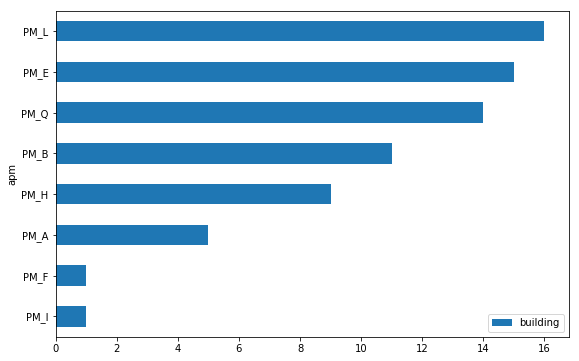

In [28]:
# build plot
apm_building.sort_values(by='building', ascending=False).head(12).plot.barh(x='apm',figsize=(9.2, 6))

# correct order
plt.gca().invert_yaxis()

PM_L manage most buildings among all assistant property managers. PM_L manage 16 buildings.

In [29]:
# create a pm_satisfaction table
pm_satisfaction = df3.groupby(['pm'])['satisfaction_rate'].mean().reset_index()
pm_satisfaction.sort_values(by='satisfaction_rate', ascending=False)

,pm,satisfaction_rate
11,PM_O,0.483429
5,PM_H,0.433882
9,PM_M,0.429053
8,PM_K,0.428020
10,PM_N,0.426000
1,PM_C,0.425312
3,PM_F,0.421546
4,PM_G,0.418787
12,PM_P,0.416000
2,PM_D,0.414156


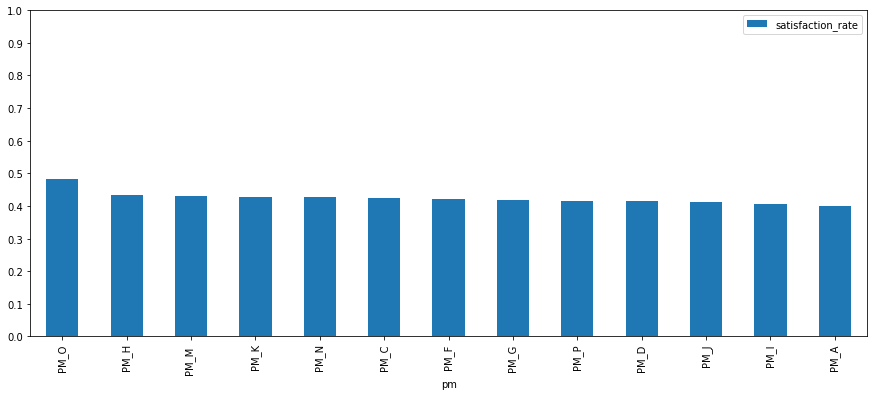

In [30]:
# build plot
pm_satisfaction_rate = df3.groupby(['pm'])['satisfaction_rate'].mean().reset_index().sort_values(by='satisfaction_rate', ascending=False).plot.bar(x='pm',figsize=(15, 6),yticks=np.arange(0, 1.1, step=0.1))


PM_O has highest overall satisfaction rate which is 48.3%, while PM_A has lowest overall satisfaction rate which is 39.9%.

In [31]:
# create a pm_availability table
pm_availability = df3.groupby(['pm'])['ease_contact'].mean().round(decimals=0).reset_index()
pm_availability.sort_values(by='ease_contact', ascending=False).head(1)

,pm,ease_contact
0,PM_A,3.0


In [32]:
# create a pm_follow_up table
pm_follow_up = df3.groupby(['pm'])['follow_up'].mean().round(decimals=0).reset_index()
pm_follow_up.sort_values(by='follow_up', ascending=False).head(1)

,pm,follow_up
3,PM_F,3.0


In [33]:
# create a pm_consideration table
pm_consideration = df3.groupby(['pm'])['consideration'].mean().round(decimals=0).reset_index()
pm_consideration.sort_values(by='consideration', ascending=False).head(1)

,pm,consideration
2,PM_D,3.0


In [34]:
# create a pm_response table
pm_response = df3.groupby(['pm'])['response'].mean().round(decimals=0).reset_index()
pm_response.sort_values(by='response', ascending=False).head(1)

,pm,response
1,PM_C,3.0


In [35]:
# create a pm_communication table
pm_communication = df3.groupby(['pm'])['communication'].mean().round(decimals=0).reset_index()
pm_communication.sort_values(by='communication', ascending=False).head(1)

,pm,communication
1,PM_C,3.0


According to the tables above:
1. PM_C has best performace on communication and reponsiveness.
2. PM_D is most considerable.
3. PM_F has highest score on follow up.
4. PM_A is the easiest to reach.

In [36]:
# create an apm_availability table
apm_availability = df3.groupby(['apm'])['ease_contact'].mean().round(decimals=0).reset_index()
apm_availability.sort_values(by='ease_contact', ascending=False).head(1)

,apm,ease_contact
1,PM_B,3.0


In [37]:
# create an apm_follow_up table
apm_follow_up = df3.groupby(['apm'])['follow_up'].mean().round(decimals=0).reset_index()
apm_follow_up.sort_values(by='follow_up', ascending=False).head(1)

,apm,follow_up
0,PM_A,3.0


In [38]:
# create an apm_consideration table
apm_consideration = df3.groupby(['apm'])['consideration'].mean().round(decimals=0).reset_index()
apm_consideration.sort_values(by='consideration', ascending=False).head(1)

,apm,consideration
0,PM_A,3.0


In [39]:
# create an apm_response table
apm_response = df3.groupby(['apm'])['response'].mean().round(decimals=0).reset_index()
apm_response.sort_values(by='response', ascending=False).head(1)

,apm,response
0,PM_A,3.0


In [40]:
# create an apm_communication table
apm_communication = df3.groupby(['apm'])['communication'].mean().round(decimals=0).reset_index()
apm_communication.sort_values(by='communication', ascending=False).head(1)

,apm,communication
2,PM_E,3.0


According to the tables above:
1. PM_E has best performace on communication. 
2. PM_A has best performace on follow up, consideration,and reponsiveness.
3. PM_B has highest score on availibility.

### By Improvement

In [41]:
# create an improvement_tenant table
improvement_tenant = df3.groupby(['improvement'])['tenant'].count().reset_index()
improvement_tenant.sort_values(by='tenant', ascending=False)

,improvement,tenant
0,availability,334
2,friendliness,320
1,communication,319
4,responsiveness,306
3,problem resolution,295


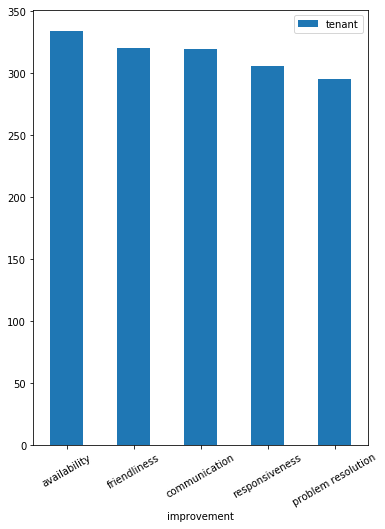

In [42]:
# build plot
improvement_tenant_plot = df3.groupby(['improvement'])['tenant'].count().reset_index().sort_values(by='tenant', ascending=False).plot.bar(x='improvement',figsize=(6,8),rot=30)


There are 334 respondents are expected to see improvement in availability. This makes the availability become the improvement the most respondents expected to be enhanced. The group did best job on the problem resolution. Therefore only 295 repsondents want to see enhancement on it.

### Conclusion

The EDA starts with observing the summary of the new data frame and analysis the data acquired by buildings, companies, property managers and assistant property managers, and improvement. The EDA study shows lots of insights by the aspects mentioned and would help the reacher gain a better understanding of this data frame.  

## Logistic Regression Analysis

In [116]:
# get calumns needed for analysis
df4 = pd.DataFrame(df3, columns = ['improvement','contact_fre', 'ease_contact', 'follow_up','consideration','response','communication','overall'])
df4.head(5)

,improvement,contact_fre,ease_contact,follow_up,consideration,response,communication,overall
0,availability,5.0,2.0,5.0,4.0,5.0,4.0,1.0
1,friendliness,5.0,1.0,2.0,0.0,0.0,3.0,2.0
2,responsiveness,2.0,3.0,0.0,2.0,2.0,2.0,2.0
3,friendliness,2.0,0.0,2.0,5.0,4.0,1.0,3.0
4,communication,0.0,2.0,2.0,5.0,2.0,3.0,1.0


In [93]:

# replace contact_fre col values
df4.contact_fre.replace(0.0, 'no_answer', inplace = True)
df4.contact_fre.replace(1.0, 'sdisagree', inplace = True)
df4.contact_fre.replace(2.0, 'disagree', inplace = True)
df4.contact_fre.replace(3.0, 'nature', inplace = True)
df4.contact_fre.replace(4.0, 'agree', inplace = True)
df4.contact_fre.replace(5.0, 'sagree', inplace = True)

# replace ease_contact col values
df4.ease_contact.replace(0.0, 'no_answer', inplace = True)
df4.ease_contact.replace(1.0, 'sdisagree', inplace = True)
df4.ease_contact.replace(2.0, 'disagree', inplace = True)
df4.ease_contact.replace(3.0, 'nature', inplace = True)
df4.ease_contact.replace(4.0, 'agree', inplace = True)
df4.ease_contact.replace(5.0, 'sagree', inplace = True)


# replace follow_up col values
df4.follow_up.replace(0.0, 'no_answer', inplace = True)
df4.follow_up.replace(1.0, 'sdisagree', inplace = True)
df4.follow_up.replace(2.0, 'disagree', inplace = True)
df4.follow_up.replace(3.0, 'nature', inplace = True)
df4.follow_up.replace(4.0, 'agree', inplace = True)
df4.follow_up.replace(5.0, 'sagree', inplace = True)


# replace consideration col values
df4.consideration.replace(0.0, 'no_answer', inplace = True)
df4.consideration.replace(1.0, 'sdisagree', inplace = True)
df4.consideration.replace(2.0, 'disagree', inplace = True)
df4.consideration.replace(3.0, 'nature', inplace = True)
df4.consideration.replace(4.0, 'agree', inplace = True)
df4.consideration.replace(5.0, 'sagree', inplace = True)

# replace response col values
df4.response.replace(0.0, 'no_answer', inplace = True)
df4.response.replace(1.0, 'sdisagree', inplace = True)
df4.response.replace(2.0, 'disagree', inplace = True)
df4.response.replace(3.0, 'nature', inplace = True)
df4.response.replace(4.0, 'agree', inplace = True)
df4.response.replace(5.0, 'sagree', inplace = True)

# replace communication col values
df4.communication.replace(0.0, 'no_answer', inplace = True)
df4.communication.replace(1.0, 'sdisagree', inplace = True)
df4.communication.replace(2.0, 'disagree', inplace = True)
df4.communication.replace(3.0, 'nature', inplace = True)
df4.communication.replace(4.0, 'agree', inplace = True)
df4.communication.replace(5.0, 'sagree', inplace = True)

# replace overall col values
df4.overall.replace(0.0, 'no_answer', inplace = True)
df4.overall.replace(1.0, 'sdisagree', inplace = True)
df4.overall.replace(2.0, 'disagree', inplace = True)
df4.overall.replace(3.0, 'nature', inplace = True)
df4.overall.replace(4.0, 'agree', inplace = True)
df4.overall.replace(5.0, 'sagree', inplace = True)

df4.head(5)

,improvement,contact_fre,ease_contact,follow_up,consideration,response,communication,overall
0,availability,sagree,disagree,sagree,agree,sagree,agree,sdisagree
1,friendliness,sagree,sdisagree,disagree,no_answer,no_answer,nature,disagree
2,responsiveness,disagree,nature,no_answer,disagree,disagree,disagree,disagree
3,friendliness,disagree,no_answer,disagree,sagree,agree,sdisagree,nature
4,communication,no_answer,disagree,disagree,sagree,disagree,nature,sdisagree


In [94]:
# get dummuy data
df5 = pd.get_dummies(df4)
df5.head(5)

,improvement_availability,improvement_communication,improvement_friendliness,improvement_problem resolution,improvement_responsiveness,contact_fre_agree,contact_fre_disagree,contact_fre_nature,contact_fre_no_answer,contact_fre_sagree,...,communication_nature,communication_no_answer,communication_sagree,communication_sdisagree,overall_agree,overall_disagree,overall_nature,overall_no_answer,overall_sagree,overall_sdisagree
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1


In [97]:
y, X = dmatrices("improvement_availability ~ contact_fre_no_answer + contact_fre_sagree + contact_fre_agree + contact_fre_nature + contact_fre_disagree + contact_fre_sdisagree \
                 + ease_contact_no_answer + ease_contact_sagree + ease_contact_agree + ease_contact_nature + ease_contact_disagree + ease_contact_sdisagree \
                 + follow_up_no_answer + follow_up_sagree + follow_up_agree + follow_up_nature + follow_up_disagree + follow_up_sdisagree \
                 + consideration_no_answer + consideration_sagree + consideration_agree + consideration_nature + consideration_disagree + consideration_sdisagree \
                 + response_no_answer + response_sagree + response_agree + response_nature + response_disagree + response_sdisagree \
                 + communication_no_answer + communication_sagree + communication_agree + communication_nature + communication_disagree + communication_sdisagree \
                 + overall_no_answer + overall_sagree + overall_agree + overall_nature + overall_disagree + overall_sdisagree", df5, return_type="dataframe")
print(X.columns)

Index(['Intercept', 'contact_fre_no_answer', 'contact_fre_sagree',
       'contact_fre_agree', 'contact_fre_nature', 'contact_fre_disagree',
       'contact_fre_sdisagree', 'ease_contact_no_answer',
       'ease_contact_sagree', 'ease_contact_agree', 'ease_contact_nature',
       'ease_contact_disagree', 'ease_contact_sdisagree',
       'follow_up_no_answer', 'follow_up_sagree', 'follow_up_agree',
       'follow_up_nature', 'follow_up_disagree', 'follow_up_sdisagree',
       'consideration_no_answer', 'consideration_sagree',
       'consideration_agree', 'consideration_nature', 'consideration_disagree',
       'consideration_sdisagree', 'response_no_answer', 'response_sagree',
       'response_agree', 'response_nature', 'response_disagree',
       'response_sdisagree', 'communication_no_answer', 'communication_sagree',
       'communication_agree', 'communication_nature', 'communication_disagree',
       'communication_sdisagree', 'overall_no_answer', 'overall_sagree',
       'overall_

In [98]:
# flatten y into a 1-D array
y = np.ravel(y)

In [100]:
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression(solver='lbfgs')
model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)

0.7884371029224905

In [101]:
# what percentage are availability?
y.mean()

0.2121982210927573

In [122]:
# examine the coefficients
pd.DataFrame(list(zip(X.columns, np.transpose(model.coef_)))).sort_values(by=1, ascending=False, na_position='first').head(5)

,0,1
40,overall_nature,[0.3518862055201379]
32,communication_sagree,[0.21038344927038452]
1,contact_fre_no_answer,[0.17943045907443272]
23,consideration_disagree,[0.169054417042599]
31,communication_no_answer,[0.16901094625849522]


In [103]:
y, X = dmatrices("improvement_communication ~ contact_fre_no_answer + contact_fre_sagree + contact_fre_agree + contact_fre_nature + contact_fre_disagree + contact_fre_sdisagree \
                 + ease_contact_no_answer + ease_contact_sagree + ease_contact_agree + ease_contact_nature + ease_contact_disagree + ease_contact_sdisagree \
                 + follow_up_no_answer + follow_up_sagree + follow_up_agree + follow_up_nature + follow_up_disagree + follow_up_sdisagree \
                 + consideration_no_answer + consideration_sagree + consideration_agree + consideration_nature + consideration_disagree + consideration_sdisagree \
                 + response_no_answer + response_sagree + response_agree + response_nature + response_disagree + response_sdisagree \
                 + communication_no_answer + communication_sagree + communication_agree + communication_nature + communication_disagree + communication_sdisagree \
                 + overall_no_answer + overall_sagree + overall_agree + overall_nature + overall_disagree + overall_sdisagree", df5, return_type="dataframe")
print(X.columns)

Index(['Intercept', 'contact_fre_no_answer', 'contact_fre_sagree',
       'contact_fre_agree', 'contact_fre_nature', 'contact_fre_disagree',
       'contact_fre_sdisagree', 'ease_contact_no_answer',
       'ease_contact_sagree', 'ease_contact_agree', 'ease_contact_nature',
       'ease_contact_disagree', 'ease_contact_sdisagree',
       'follow_up_no_answer', 'follow_up_sagree', 'follow_up_agree',
       'follow_up_nature', 'follow_up_disagree', 'follow_up_sdisagree',
       'consideration_no_answer', 'consideration_sagree',
       'consideration_agree', 'consideration_nature', 'consideration_disagree',
       'consideration_sdisagree', 'response_no_answer', 'response_sagree',
       'response_agree', 'response_nature', 'response_disagree',
       'response_sdisagree', 'communication_no_answer', 'communication_sagree',
       'communication_agree', 'communication_nature', 'communication_disagree',
       'communication_sdisagree', 'overall_no_answer', 'overall_sagree',
       'overall_

In [120]:
# flatten y into a 1-D array
y = np.ravel(y)

# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression(solver='lbfgs')
model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)

0.8055908513341804

In [105]:
# what percentage are communication?
y.mean()

0.20266836086404066

In [121]:
# examine the coefficients
pd.DataFrame(list(zip(X.columns, np.transpose(model.coef_)))).sort_values(by=1, ascending=False, na_position='first').head(5)

,0,1
40,overall_nature,[0.3518862055201379]
32,communication_sagree,[0.21038344927038452]
1,contact_fre_no_answer,[0.17943045907443272]
23,consideration_disagree,[0.169054417042599]
31,communication_no_answer,[0.16901094625849522]


In [109]:
y, X = dmatrices("improvement_friendliness ~ contact_fre_no_answer + contact_fre_sagree + contact_fre_agree + contact_fre_nature + contact_fre_disagree + contact_fre_sdisagree \
                 + ease_contact_no_answer + ease_contact_sagree + ease_contact_agree + ease_contact_nature + ease_contact_disagree + ease_contact_sdisagree \
                 + follow_up_no_answer + follow_up_sagree + follow_up_agree + follow_up_nature + follow_up_disagree + follow_up_sdisagree \
                 + consideration_no_answer + consideration_sagree + consideration_agree + consideration_nature + consideration_disagree + consideration_sdisagree \
                 + response_no_answer + response_sagree + response_agree + response_nature + response_disagree + response_sdisagree \
                 + communication_no_answer + communication_sagree + communication_agree + communication_nature + communication_disagree + communication_sdisagree \
                 + overall_no_answer + overall_sagree + overall_agree + overall_nature + overall_disagree + overall_sdisagree", df5, return_type="dataframe")
print(X.columns)

# flatten y into a 1-D array
y = np.ravel(y)

# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression(solver='lbfgs')
model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)

Index(['Intercept', 'contact_fre_no_answer', 'contact_fre_sagree',
       'contact_fre_agree', 'contact_fre_nature', 'contact_fre_disagree',
       'contact_fre_sdisagree', 'ease_contact_no_answer',
       'ease_contact_sagree', 'ease_contact_agree', 'ease_contact_nature',
       'ease_contact_disagree', 'ease_contact_sdisagree',
       'follow_up_no_answer', 'follow_up_sagree', 'follow_up_agree',
       'follow_up_nature', 'follow_up_disagree', 'follow_up_sdisagree',
       'consideration_no_answer', 'consideration_sagree',
       'consideration_agree', 'consideration_nature', 'consideration_disagree',
       'consideration_sdisagree', 'response_no_answer', 'response_sagree',
       'response_agree', 'response_nature', 'response_disagree',
       'response_sdisagree', 'communication_no_answer', 'communication_sagree',
       'communication_agree', 'communication_nature', 'communication_disagree',
       'communication_sdisagree', 'overall_no_answer', 'overall_sagree',
       'overall_

0.7966963151207116

In [110]:
# what percentage are communication?
y.mean()

0.20330368487928843

In [118]:
# examine the coefficients
pd.DataFrame(list(zip(X.columns, np.transpose(model.coef_)))).sort_values(by=1, ascending=False, na_position='first').head(5)

,0,1
40,overall_nature,[0.3518862055201379]
32,communication_sagree,[0.21038344927038452]
1,contact_fre_no_answer,[0.17943045907443272]
23,consideration_disagree,[0.169054417042599]
31,communication_no_answer,[0.16901094625849522]


In [117]:
y, X = dmatrices("improvement_responsiveness ~ contact_fre_no_answer + contact_fre_sagree + contact_fre_agree + contact_fre_nature + contact_fre_disagree + contact_fre_sdisagree \
                 + ease_contact_no_answer + ease_contact_sagree + ease_contact_agree + ease_contact_nature + ease_contact_disagree + ease_contact_sdisagree \
                 + follow_up_no_answer + follow_up_sagree + follow_up_agree + follow_up_nature + follow_up_disagree + follow_up_sdisagree \
                 + consideration_no_answer + consideration_sagree + consideration_agree + consideration_nature + consideration_disagree + consideration_sdisagree \
                 + response_no_answer + response_sagree + response_agree + response_nature + response_disagree + response_sdisagree \
                 + communication_no_answer + communication_sagree + communication_agree + communication_nature + communication_disagree + communication_sdisagree \
                 + overall_no_answer + overall_sagree + overall_agree + overall_nature + overall_disagree + overall_sdisagree", df5, return_type="dataframe")
print(X.columns)

# flatten y into a 1-D array
y = np.ravel(y)

# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression(solver='lbfgs')
model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)

Index(['Intercept', 'contact_fre_no_answer', 'contact_fre_sagree',
       'contact_fre_agree', 'contact_fre_nature', 'contact_fre_disagree',
       'contact_fre_sdisagree', 'ease_contact_no_answer',
       'ease_contact_sagree', 'ease_contact_agree', 'ease_contact_nature',
       'ease_contact_disagree', 'ease_contact_sdisagree',
       'follow_up_no_answer', 'follow_up_sagree', 'follow_up_agree',
       'follow_up_nature', 'follow_up_disagree', 'follow_up_sdisagree',
       'consideration_no_answer', 'consideration_sagree',
       'consideration_agree', 'consideration_nature', 'consideration_disagree',
       'consideration_sdisagree', 'response_no_answer', 'response_sagree',
       'response_agree', 'response_nature', 'response_disagree',
       'response_sdisagree', 'communication_no_answer', 'communication_sagree',
       'communication_agree', 'communication_nature', 'communication_disagree',
       'communication_sdisagree', 'overall_no_answer', 'overall_sagree',
       'overall_

0.8055908513341804

In [123]:
# examine the coefficients
pd.DataFrame(list(zip(X.columns, np.transpose(model.coef_)))).sort_values(by=1, ascending=False, na_position='first').head(5)

,0,1
40,overall_nature,[0.3518862055201379]
32,communication_sagree,[0.21038344927038452]
1,contact_fre_no_answer,[0.17943045907443272]
23,consideration_disagree,[0.169054417042599]
31,communication_no_answer,[0.16901094625849522]
